# Convolutional Neural Network
- Demonstrates training a simple Convolutional Neural Network (CNN) to classify CIFAR images

### Import TensorFlow and necessary libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

print('TensorFlow version', tf.__version__)

TensorFlow version 2.9.1


### Download the CIFAR10 dataset
- The CIFAR10 dataset contains 60,000 images in 10 classes, with 6,000 images in each class. The dataset is split into 50,000 training images and 10,000 testing images 

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 22s 0us/step


In [4]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

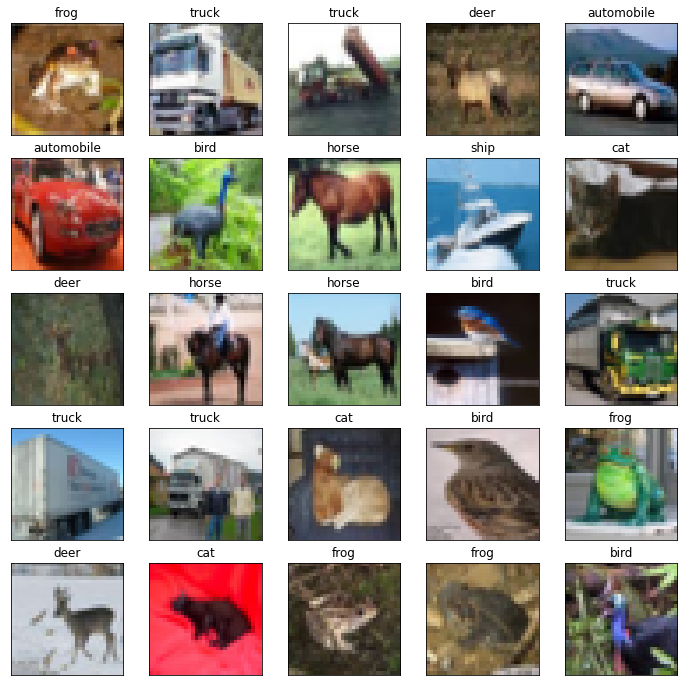

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]) # remove xticks
    plt.yticks([]) # remove yticks
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])

plt.show()

### Create the convolutional neural network model
- The convolutional neural network consists of a stack of ```layers.Conv2D``` and ```layers.MaxPooling2D``` layers
- A CNN takes tensors of shape (image_height, image_width, color_channels) as input, and it is done by passing the argument ```input_shape``` to the first layer
- The output of every ```layers.Conv2D``` and ```layers.MaxPooling2D``` is a 3D tensor of shape (height, width, channels) where the number of output channels is from the first argument of the layer. As model summary shown below, the height and width dimensions tend to **shrink** as the model goes deeper.

In [6]:
num_classes = 10

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # used when classifying multiple classes
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 49s 30ms/step - loss: 1.5848 - accuracy: 0.4208 - val_loss: 1.2940 - val_accuracy: 0.5372
Epoch 2/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.2138 - accuracy: 0.5685 - val_loss: 1.2025 - val_accuracy: 0.5691
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.0542 - accuracy: 0.6250 - val_loss: 1.0176 - val_accuracy: 0.6410
Epoch 4/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9458 - accuracy: 0.6663 - val_loss: 0.9570 - val_accuracy: 0.6609
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8647 - accuracy: 0.6982 - val_loss: 0.8973 - val_accuracy: 0.6902
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8060 - accuracy: 0.7159 - val_loss: 0.9004 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7607 - accuracy: 0.7350 - val_loss: 0.8816 -

### Evaluate the model

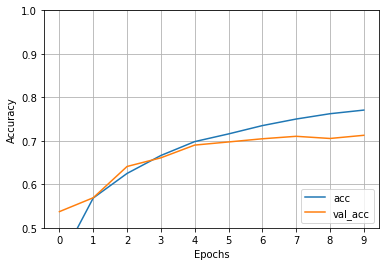

In [12]:
plt.figure()
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [13]:
model_eval = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.8660 - accuracy: 0.7127 - 2s/epoch - 7ms/step


In [14]:
print('Test Accuracy:', model_eval[1])

Test Accuracy: 0.7127000093460083
